In [1]:
from futures_utils import *
from ib_async import *




ib = IB()
await ib.connectAsync("127.0.0.1", 4001, clientId=11)
util.startLoop()




In [ ]:
ib.disconnect()

In [2]:
print(ib.isConnected())

True


In [2]:
from ib_async import IB
import datetime as dt


symbol, exchange, currency = "CL", "NYMEX", "USD"
day = dt.date(2025, 4, 10)

# only check the next 4 expiries; skip contracts <5 DTE
traded = await list_traded_futures_on_day(
    ib, symbol, exchange, currency, day,
    next_n=4, min_days_to_expiry=5, concurrent=3
)

print(f"Found {len(traded)} traded (next 4 expiries) on {day}:")
for x in traded:
    c = x["contract"]
    print(f"  {c.localSymbol or c.symbol} {c.lastTradeDateOrContractMonth}  vol={x['volume']}  DTE={x['days_to_expiry']}")

top2 = top_k_by_volume(traded, k=2)
print("\nTop-2 by volume:")
for x in top2:
    c = x["contract"]
    print(f"  {c.localSymbol or c.symbol} {c.lastTradeDateOrContractMonth}  vol={x['volume']}  DTE={x['days_to_expiry']}")


Found 4 traded (next 4 expiries) on 2025-04-10:
  CLU5 20250820  vol=5059  DTE=132
  CLV5 20250922  vol=2121  DTE=165
  CLX5 20251021  vol=768  DTE=194
  CLZ5 20251120  vol=23031  DTE=224

Top-2 by volume:
  CLZ5 20251120  vol=23031  DTE=224
  CLU5 20250820  vol=5059  DTE=132


In [3]:


c1, c2 = top2[0]["contract"], top2[1]["contract"]
bars1 = await fetch_minute_bars(ib, c1, duration="1 D", bar_size="1 min")
print('sleeping')
await asyncio.sleep(5)
bars2 = await fetch_minute_bars(ib, c2, duration="1 D", bar_size="1 min")

print(f"Got {len(bars1)} and {len(bars2)} 1-minute bars.")

sleeping
Got 592 and 592 1-minute bars.


In [4]:
close1, close2 = [b.close for b in bars1], [b.close for b in bars2]

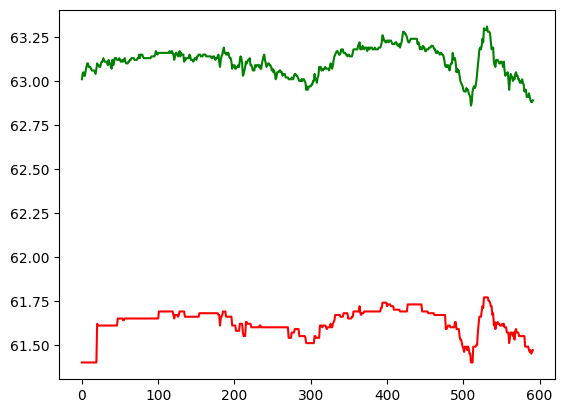

In [5]:
import matplotlib.pyplot as plt

plt.plot(close1, color='red')
plt.plot(close2, color='green')
plt.show()